# Taller Clasificacion Johan Santiago Caro Valencia y Juan Sebastian Rodriguez Salazar

knn
naives
arboles
regresion logistica
redes neuronales

In [ ]:
!pip3 install Tensorflow

In [ ]:
!pip install prince

In [ ]:
# Core
import pandas as pd
import numpy as np
import sklearn
import math
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import prince
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Tensorflow
import tensorflow
from tensorflow import keras
from keras import layers,models
from keras.models import Sequential
from keras.layers import Dense

# Models - Clasificación
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import ADASYN
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import cross_val_score, KFold

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display, Markdown

# Funciones

#Convert Categorico

In [ ]:
def convertCategorico(dataframe, columnas):
    encoded_data = pd.get_dummies(dataframe, columns=columnas)
    return encoded_data


##EncodeLabel

In [ ]:
def encodeLabel(dataframe, columnas):
  le = LabelEncoder()
  for i in columnas:
    dataframe[i] = le.fit_transform(dataframe[i])

##Split Data

In [ ]:
def splitData(dataframe, columnY):
  X = dataframe.drop([columnY], axis = 1)
  y = dataframe[columnY]

  return X, y

##Train Test

In [ ]:
def trainTest(X, y, testSize, randomState):
  X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = testSize, random_state = randomState, shuffle = True)

  return X_train, X_test, y_train, y_test

##Reporte Clasificación

In [ ]:
def reporteClasificacion(y_test, y_pred):
  print(f"Reporte de clasificación:")
  print(classification_report(y_test, y_pred))
  print("\n")

def generar_reporte_parrafo(y_test, y_pred):
    reporte = classification_report(y_test, y_pred, output_dict=True)
    clases = list(reporte.keys())[:-3]  # Obtener nombres de clases (ignorar 'accuracy', 'macro avg' y 'weighted avg')
    parrafo = "Reporte de clasificación:\n\n"
    parrafo += "Explicación de métricas:\n"
    parrafo += "- Precision: La proporción de observaciones positivas correctas respecto a las predicciones positivas totales.\n"
    parrafo += "- Recall: La proporción de observaciones positivas correctas respecto a todas las observaciones de la clase.\n"
    parrafo += "- F1-Score: Una medida ponderada de la precisión y el recall, donde el mejor valor es 1 y el peor es 0.\n"
    parrafo += "- Support: El número de ocurrencias de cada clase en los datos de prueba.\n\n"
    for clase in clases:
        parrafo += f"Clase {clase}:\n"
        for metrica, valor in reporte[clase].items():
            parrafo += f"- {metrica}: {valor:.2f}\n"
        parrafo += "\n"
    return parrafo.strip()


def retorno_reporte_clasificacion(y_test, y_pred):
    return classification_report(y_test, y_pred, output_dict=True)


def graficar_reporte_clasificacion(reporte_clasificacion):
    clases = list(reporte_clasificacion.keys())[:-3]  # Obtener nombres de clases (ignorar 'accuracy', 'macro avg' y 'weighted avg')
    precision = [reporte_clasificacion[clase]['precision'] for clase in clases]
    recall = [reporte_clasificacion[clase]['recall'] for clase in clases]
    f1_score = [reporte_clasificacion[clase]['f1-score'] for clase in clases]

    x = np.arange(len(clases))
    width = 0.2

    plt.figure(figsize=(10, 6))
    plt.barh(x - width, precision, width, label='Precision')
    plt.barh(x, recall, width, label='Recall')
    plt.barh(x + width, f1_score, width, label='F1-Score')

    plt.xlabel('Score')
    plt.yticks(x, clases)
    plt.title('Métricas por Clase')
    plt.legend()
    plt.show()


##Matrix de confusion

In [ ]:
def retorno_matriz_confusion(y_test, y_pred):
  return confusion_matrix(y_test, y_pred)

def correlacion_matrix(data, column, porcentajeCorrelacion):
  corr_matrix = data.corr()

  top_corr_features = corr_matrix.index[abs(corr_matrix[column]) >= porcentajeCorrelacion]


  plt.figure(figsize=(10, 6))
  sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="coolwarm")

  plt.title(f'Matriz de Correlación de las Variables mas correlacionadas con {column}')
  plt.show()

  def graficar_matriz_confusion(matriz_confusion, clases=None):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    if clases is not None:
        sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=clases, yticklabels=clases)
    else:
        sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Clase Predicha')
    plt.ylabel('Clase Real')
    plt.title('Matriz de Confusión')
    plt.show()

In [ ]:
df=pd.read_excel('/content/Colesterol.xlsx')
df1=df.copy()

df.head()

,Edad,Sexo,PS,Na,K,Droga,Colesterol
0,23,F,ALTO,0.792535,0.031258,drogaY,ALTO
1,47,M,BAJO,0.739309,0.056468,drogaC,ALTO
2,47,M,BAJO,0.697269,0.068944,drogaC,ALTO
3,28,F,NORMAL,0.563682,0.072289,drogaX,ALTO
4,61,F,BAJO,0.559294,0.030998,drogaY,ALTO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Sexo        200 non-null    object 
 2   PS          200 non-null    object 
 3   Na          200 non-null    float64
 4   K           200 non-null    float64
 5   Droga       200 non-null    object 
 6   Colesterol  200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


In [ ]:
encodeLabel(df,['Colesterol'])

In [ ]:
categorical_columns = ['Sexo', 'PS','Droga' ]
data_categorical = df[categorical_columns]

In [ ]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    200 non-null    object
 1   PS      200 non-null    object
 2   Droga   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
data_cleaned = data_categorical

# Convertir a categoría las columnas relevantes
for col in ['Sexo', 'PS','Droga' ]:
    data_cleaned[col] = data_cleaned[col].astype('category')

print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sexo    200 non-null    category
 1   PS      200 non-null    category
 2   Droga   200 non-null    category
dtypes: category(3)
memory usage: 1.2 KB
None


<ipython-input-348-944861fe1df6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].astype('category')
<ipython-input-348-944861fe1df6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = data_cleaned[col].astype('category')
<ipython-input-348-944861fe1df6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

# ACM

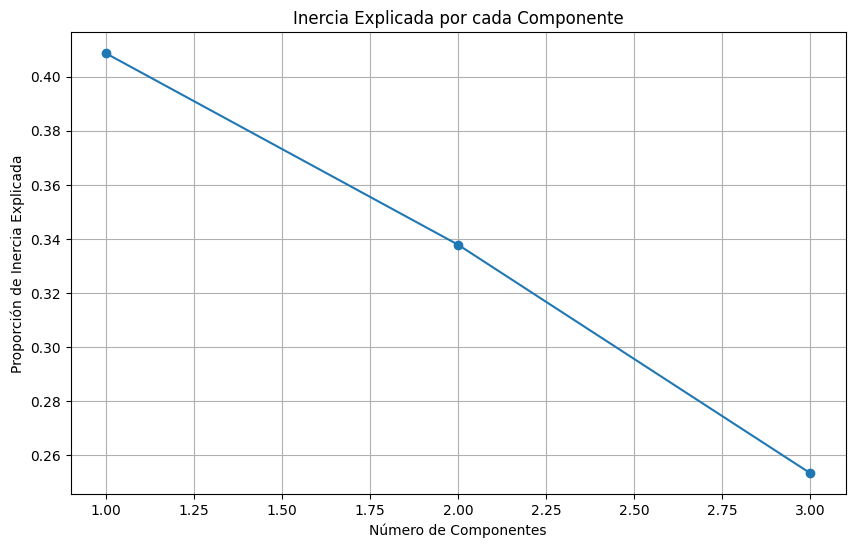

Inercia Acumulada: 0    0.408692
1    0.746592
2    1.000000
dtype: float64


In [ ]:
mca = prince.MCA(n_components=len(categorical_columns), random_state=42)
mca = mca.fit(data_categorical)
coordinates = mca.transform(data_categorical)

# Calcular la inercia explicada
explained_inertia = (coordinates ** 2).sum(axis=0) / (coordinates ** 2).sum().sum()

# Graficar la inercia explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_inertia) + 1), explained_inertia, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Inercia Explicada')
plt.title('Inercia Explicada por cada Componente')
plt.grid()
plt.show()

# Mostrar la inercia acumulada
cumulative_inertia = explained_inertia.cumsum()
print("Inercia Acumulada:", cumulative_inertia)

In [ ]:
optimal_components = 2  # Supongamos que se decidió usar 2 componentes
mca = prince.MCA(n_components=optimal_components, random_state=42)
mca_results = mca.fit_transform(data_categorical.select_dtypes(['category']))

# Añadir los resultados al DataFrame
numerical_columns=['Edad', 'Na','K', 'Colesterol']
data_numerical = df[numerical_columns]
df_all = data_numerical.copy()
df_all['MCA1'] = mca_results.iloc[:, 0]
df_all['MCA2'] = mca_results.iloc[:, 1]
#--------------------------------------------------------------



In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Edad        200 non-null    int64  
 1   Na          200 non-null    float64
 2   K           200 non-null    float64
 3   Colesterol  200 non-null    int64  
 4   MCA1        200 non-null    float64
 5   MCA2        200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB


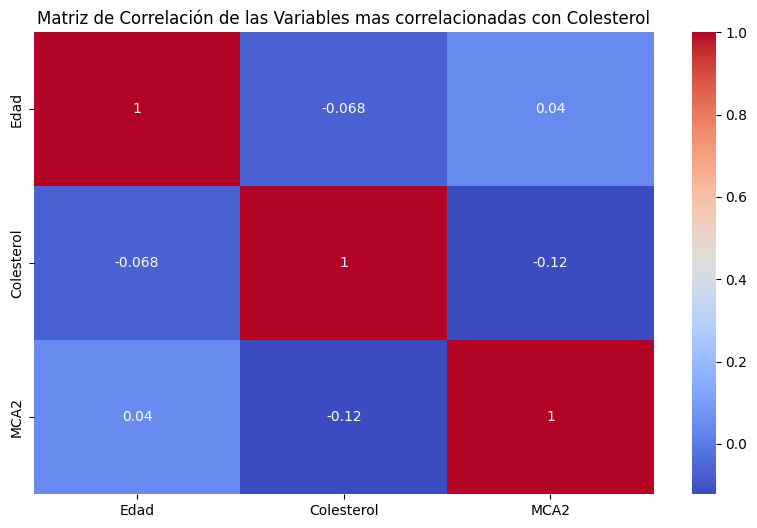

In [ ]:
correlacion_matrix(df_all, 'Colesterol', 0.05)

# *KNN*

In [ ]:
X,y = splitData(df_all, 'Colesterol')

In [ ]:
columnas_seleccionadas = ['Edad', 'MCA2']

In [ ]:
KNN_df = df_all[columnas_seleccionadas]

In [ ]:
smote = SMOTE(sampling_strategy={0: 1000, 1: 800}, random_state=42)
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 103)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (800) in class 1 will be larger than the number of samples in the majority class (class #0 -> 103)
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = trainTest(X, y, 0.1, 1234)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


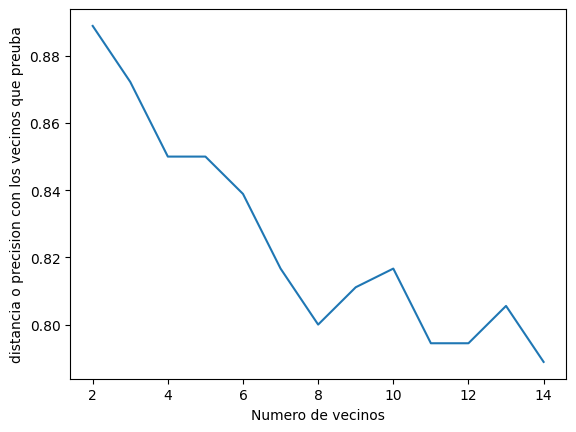

In [ ]:
distancia=[]
for i in range(2,15):
  knprueba=KNeighborsClassifier(n_neighbors=i)
  knprueba.fit(X_train,y_train)
  distancia.append(knprueba.score(X_test,y_test))

plt.plot(range(2,15),distancia)
plt.xlabel('Numero de vecinos')
plt.ylabel('distancia o precision con los vecinos que preuba')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

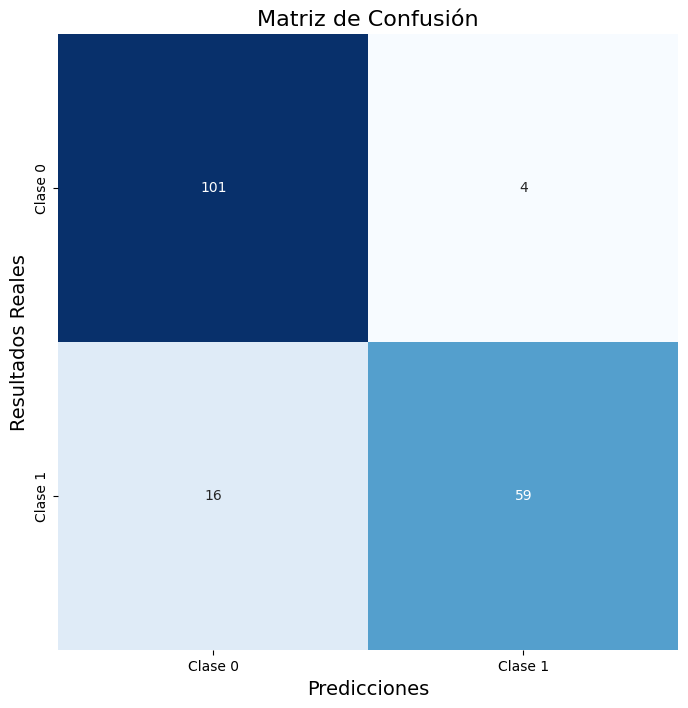

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)

ax.set_title('Matriz de Confusión', fontsize=16)
ax.set_xlabel('Predicciones', fontsize=14)
ax.set_ylabel('Resultados Reales', fontsize=14)

ax.xaxis.set_ticklabels(['Clase 0', 'Clase 1'])
ax.yaxis.set_ticklabels(['Clase 0', 'Clase 1'])

plt.show()

In [ ]:
reporteClasificacion(y_test,y_pred)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       105
           1       0.94      0.79      0.86        75

    accuracy                           0.89       180
   macro avg       0.90      0.87      0.88       180
weighted avg       0.89      0.89      0.89       180





In [ ]:
print(generar_reporte_parrafo(y_test, y_pred))

Reporte de clasificación:

Explicación de métricas:
- Precision: La proporción de observaciones positivas correctas respecto a las predicciones positivas totales.
- Recall: La proporción de observaciones positivas correctas respecto a todas las observaciones de la clase.
- F1-Score: Una medida ponderada de la precisión y el recall, donde el mejor valor es 1 y el peor es 0.
- Support: El número de ocurrencias de cada clase en los datos de prueba.

Clase 0:
- precision: 0.86
- recall: 0.96
- f1-score: 0.91
- support: 105.00

Clase 1:
- precision: 0.94
- recall: 0.79
- f1-score: 0.86
- support: 75.00


# Regresion Logistica

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

grid = GridSearchCV(LogisticRegression(random_state=1234), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f'El mejor parámetro C es: {grid.best_params_}')

El mejor parámetro C es: {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
classifier = LogisticRegression(C=1, penalty = 'l2',random_state = 1234)
classifier.fit(X_train, y_train)

LogisticRegression(C=1, random_state=1234)

In [ ]:
y_pred = classifier.predict(X_test)

Precisión del modelo: 0.5444444444444444
Matriz de confusión:
[[76 29]
 [53 22]]


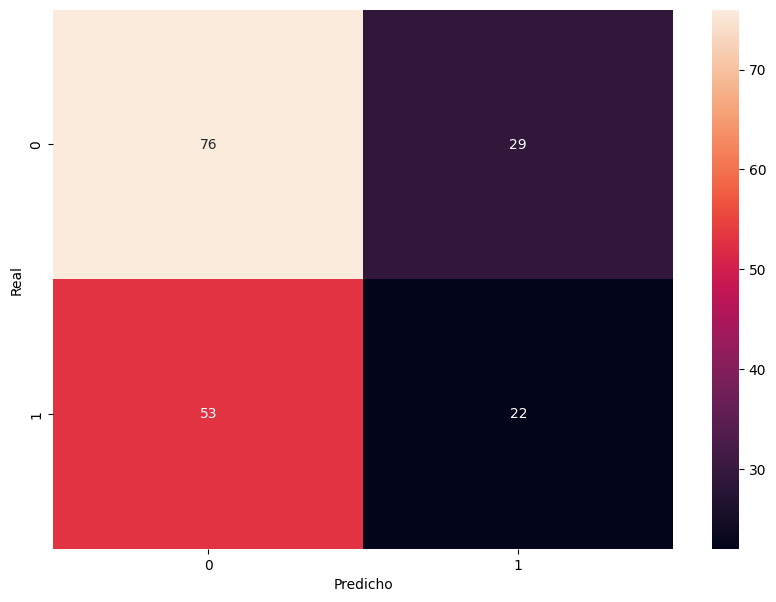

In [ ]:
cm = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

print('Matriz de confusión:')
print(cm)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
reporteClasificacion(y_test,y_pred)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       105
           1       0.43      0.29      0.35        75

    accuracy                           0.54       180
   macro avg       0.51      0.51      0.50       180
weighted avg       0.52      0.54      0.52       180





In [ ]:
y_pred = classifier.predict(X_test)

precision = accuracy_score(y_test, y_pred)

# Imprimimos la precisión
print(f'La precisión del modelo es: {precision * 100:.2f}%')

La precisión del modelo es: 54.44%


In [ ]:
print(generar_reporte_parrafo(y_test, y_pred))

Reporte de clasificación:

Explicación de métricas:
- Precision: La proporción de observaciones positivas correctas respecto a las predicciones positivas totales.
- Recall: La proporción de observaciones positivas correctas respecto a todas las observaciones de la clase.
- F1-Score: Una medida ponderada de la precisión y el recall, donde el mejor valor es 1 y el peor es 0.
- Support: El número de ocurrencias de cada clase en los datos de prueba.

Clase 0:
- precision: 0.59
- recall: 0.72
- f1-score: 0.65
- support: 105.00

Clase 1:
- precision: 0.43
- recall: 0.29
- f1-score: 0.35
- support: 75.00


# BAYES NAIVES

In [ ]:
columnas_seleccionadas = ['Edad', 'MCA2','Colesterol']

NAIVES_df = df_all[columnas_seleccionadas]

In [ ]:
NAIVES_df.head()

,Edad,MCA2,Colesterol
0,23,-0.079531,0
1,47,1.826988,0
2,47,1.826988,0
3,28,-0.963152,0
4,61,0.496561,0


In [ ]:
XNAIVES,ynaives = splitData(NAIVES_df, 'Colesterol')

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(XNAIVES, ynaives, test_size=0.3, random_state=1234)

# Normalizar los datos
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train1)
X_test_normalized = scaler.transform(X_test1)

# Verificar el balance de las clases
unique, counts = np.unique(y_train1, return_counts=True)
print(dict(zip(unique, counts)))

# Si las clases no están balanceadas, aplicar SMOTE
if counts[0] != counts[1]:
    smote = SMOTE(random_state=1234)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train1)
else:
    X_train_smote, y_train_smote = X_train_normalized, y_train1

# Definir el modelo y los parámetros a probar
naive = GaussianNB()
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Crear y ajustar el GridSearchCV
grid = GridSearchCV(naive, param_grid, cv=5)
grid.fit(X_train_smote, y_train_smote)

# Entrenar el modelo con el mejor parámetro
naive = GaussianNB(var_smoothing=grid.best_params_['var_smoothing'])
naive.fit(X_train_smote, y_train_smote)

# Hacer predicciones con los datos de prueba
y_pred1 = naive.predict(X_test_normalized)

# Calcular la precisión
precision = accuracy_score(y_test1, y_pred1)

# Imprimir la precisión
print(f'La precisión del modelo con datos normalizados y SMOTE es: {precision * 100:.2f}%')

{0: 74, 1: 66}
La precisión del modelo con datos normalizados y SMOTE es: 60.00%


# Redes Neuronales

In [ ]:
X_train, X_test, y_train_redes, y_test_redes = trainTest(X, y, 0.2, 1234)
sc = StandardScaler()
X_train_redes = sc.fit_transform(X_train)
X_test_redes = sc.transform(X_test)

In [ ]:
model = Sequential()

# Asegúrate de que el número de características en tus datos de entrada coincida con lo que tu modelo espera
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train_redes.shape[1]))

model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(X_train_redes, y_train_redes, batch_size = 32, epochs = 200)

Epoch 1/200
45/45 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.5132
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5576
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5576
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5576
Epoch 5/200
45/45 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.5576
Epoch 6/200
45/45 [==============================] - 0s 6ms/step - loss: 0.6843 - accuracy: 0.5576
Epoch 7/200
45/45 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5576
Epoch 8/200
45/45 [==============================] - 0s 5ms/step - loss: 0.6816 - accuracy: 0.5576
Epoch 9/200
45/45 [==============================] - 0s 7ms/step - loss: 0.6802 - accuracy: 0.5576
Epoch 10/200
45/45 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5576
Epoch 11/

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_redes, y_test_redes, verbose=0)

print(f'La precisión del modelo en los datos de prueba es: {test_accuracy * 100}%')

La precisión del modelo en los datos de prueba es: 72.77777791023254%


12/12 [==============================] - 0s 2ms/step


Text(95.72222222222221, 0.5, 'Verdad')

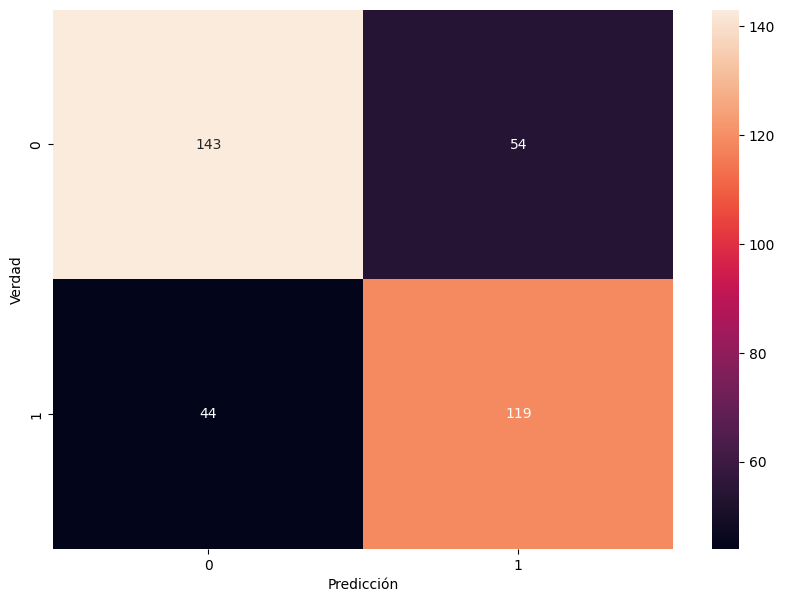

In [ ]:
y_pred = model.predict(X_test_redes)
y_pred = (y_pred > 0.5)


cm = confusion_matrix(y_test_redes, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Verdad')

# Random Forest

In [ ]:
columnas_seleccionadas = ['Edad','MCA2','Colesterol']

RF_df = df_all[columnas_seleccionadas]

In [ ]:
X,y = splitData(RF_df, 'Colesterol')

In [ ]:
smote = SMOTE(sampling_strategy={0: 1000, 1: 600}, random_state=42)
X, y = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 103)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (600) in class 1 will be larger than the number of samples in the majority class (class #0 -> 103)
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = trainTest(X, y, 0.20, 1234)


In [ ]:
randonBosque = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
randonBosque.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [ ]:
Y_pred1 = randonBosque.predict(X_test)

In [ ]:
print(Y_pred1)

[0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1]


In [ ]:
print(accuracy_score(y_test,Y_pred1))

0.85625


Matriz de confusión:
[[165  23]
 [ 23 109]]
Precisión del modelo: 0.85625


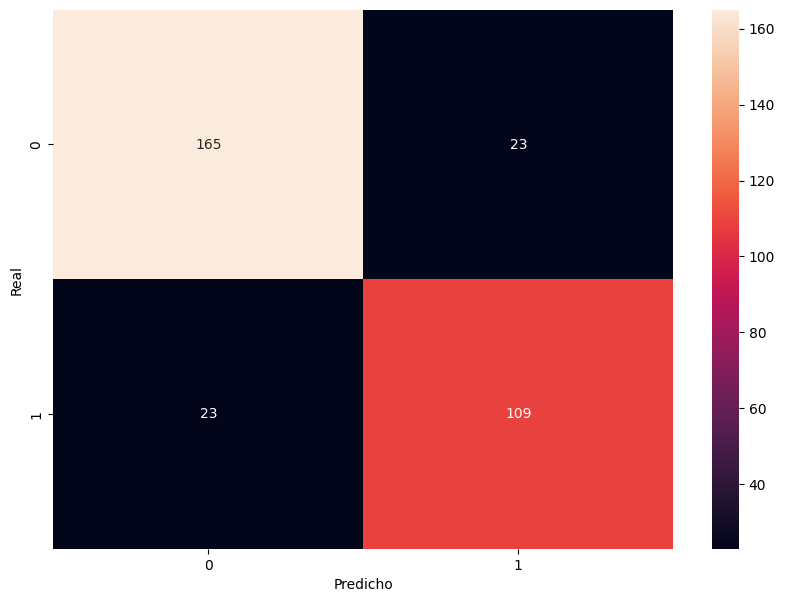

In [ ]:
cm = confusion_matrix(y_test, Y_pred1)

print('Matriz de confusión:')
print(cm)

accuracy = accuracy_score(y_test, Y_pred1)
print(f'Precisión del modelo: {accuracy}')

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
reporteClasificacion(y_test,Y_pred1)

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       188
           1       0.83      0.83      0.83       132

    accuracy                           0.86       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.86      0.86      0.86       320





In [ ]:
print(generar_reporte_parrafo(y_test, Y_pred1))

Reporte de clasificación:

Explicación de métricas:
- Precision: La proporción de observaciones positivas correctas respecto a las predicciones positivas totales.
- Recall: La proporción de observaciones positivas correctas respecto a todas las observaciones de la clase.
- F1-Score: Una medida ponderada de la precisión y el recall, donde el mejor valor es 1 y el peor es 0.
- Support: El número de ocurrencias de cada clase en los datos de prueba.

Clase 0:
- precision: 0.88
- recall: 0.88
- f1-score: 0.88
- support: 188.00

Clase 1:
- precision: 0.83
- recall: 0.83
- f1-score: 0.83
- support: 132.00


<ipython-input-411-38a6383aaecb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_values, palette='viridis')


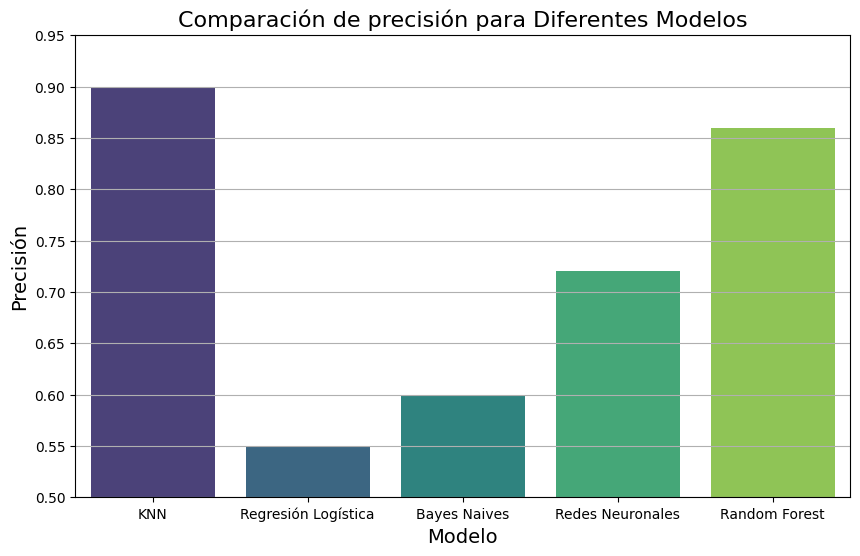

In [ ]:
accuracy_KNN = 0.90
accuracy_Regresion_logistica=  0.55
accuracy_Bayes_Naives = 0.60
accuracy_Redes_Neuronales = 0.72
accuracy_Random_forest = 0.86


accuracy_values = [accuracy_KNN,accuracy_Regresion_logistica,accuracy_Bayes_Naives,accuracy_Redes_Neuronales,accuracy_Random_forest]

models = ['KNN', 'Regresión Logística', 'Bayes Naives', 'Redes Neuronales', 'Random Forest']


plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_values, palette='viridis')

plt.xlabel('Modelo', fontsize=14)
plt.ylabel('Precisión', fontsize=14)
plt.title('Comparación de precisión para Diferentes Modelos', fontsize=16)
plt.ylim(0.5, 0.95)
plt.grid(axis='y')

plt.show()

In [ ]:
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sexo    200 non-null    category
 1   PS      200 non-null    category
 2   Droga   200 non-null    category
dtypes: category(3)
memory usage: 1.2 KB


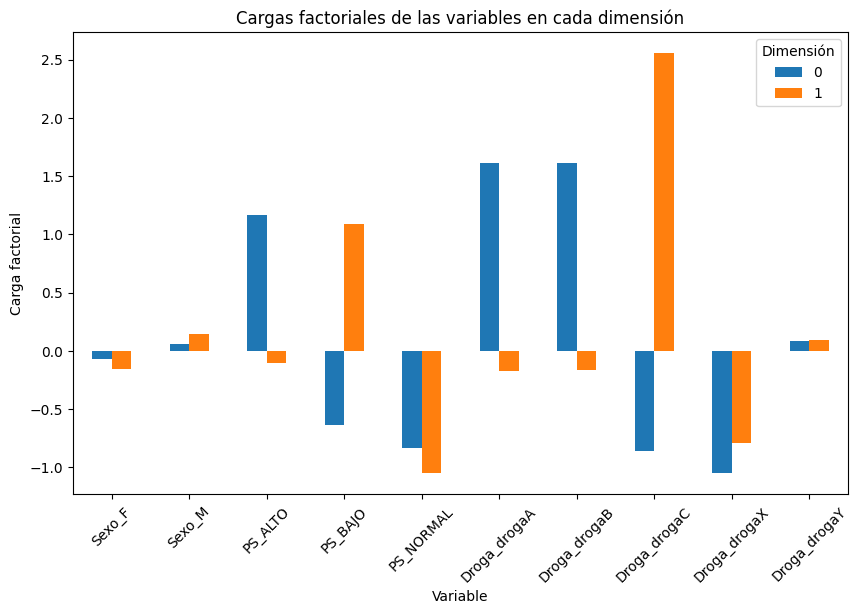

In [ ]:
loadings = mca.column_coordinates(data_categorical)
loadings.plot(kind='bar', figsize=(10, 6))
plt.title('Cargas factoriales de las variables en cada dimensión')
plt.xlabel('Variable')
plt.ylabel('Carga factorial')
plt.xticks(rotation=45)
plt.legend(title='Dimensión')
plt.show()